# Projet ADEME – Projet ADEME – Optimisation des tournées de livraison (CVRPTW)
### Livrable 1 : Modélisation formelle


<p style="color: violet; text-align: center; font-weight: bold; font-size: 18px;">
Louzazna Rayane &nbsp;/&nbsp; Adjout Mourad &nbsp;/&nbsp; Benghali Nada &nbsp;/&nbsp; Niati Mohamed
</p>


Ce livrable présente la modélisation formelle du problème TSP (Traveling Salesman Problem) dans le cadre du projet ADEME sur la mobilité durable.
L’objectif est d’optimiser les tournées de livraison en minimisant la distance totale parcourue tout en respectant les contraintes de capacité des véhicules et de fenêtres temporelles des clients.
Une formalisation mathématique complète, une analyse de complexité et des illustrations de réduction de complexité sont proposées.

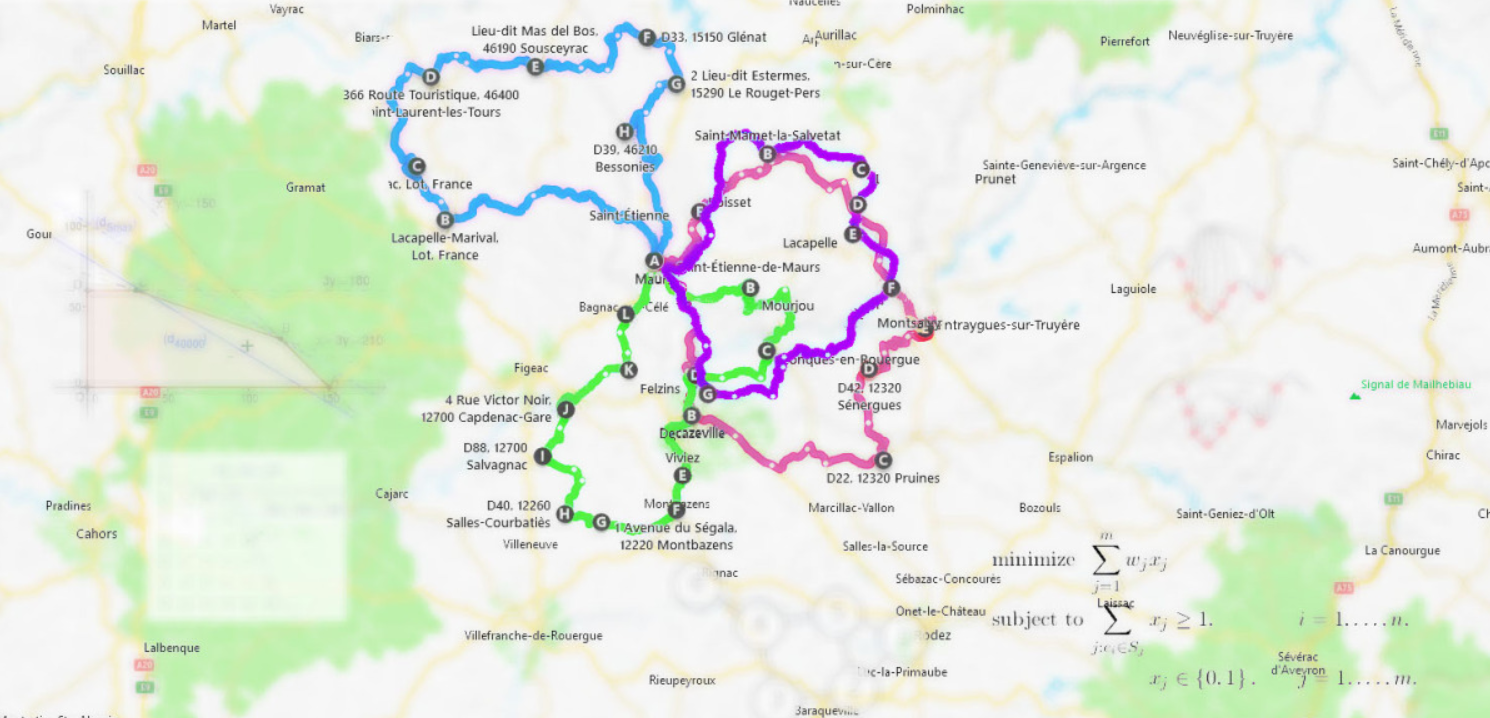



### 1. Introduction

Dans le cadre du projet ADEME sur la mobilité durable, nous étudions un problème d’optimisation de tournées de livraison.  
L’objectif est de déterminer **l’ordre optimal de visite** des clients afin de **minimiser la distance totale parcourue**, tout en respectant certaines **contraintes logistiques** telles que la capacité des véhicules ou les demandes de livraison.

Ce problème est une **généralisation du Problème du Voyageur de Commerce (TSP)**, souvent désigné sous le nom de **Vehicle Routing Problem (VRP)**.

Le présent livrable a pour but :
- de **formaliser le problème** sous forme mathématique et algorithmique ;
- d’en **analyser la complexité théorique** ;
- et de **poser les bases** pour une future résolution via des métaheuristiques (dans les livrables suivants).


### 2. Représentation graphique du problème


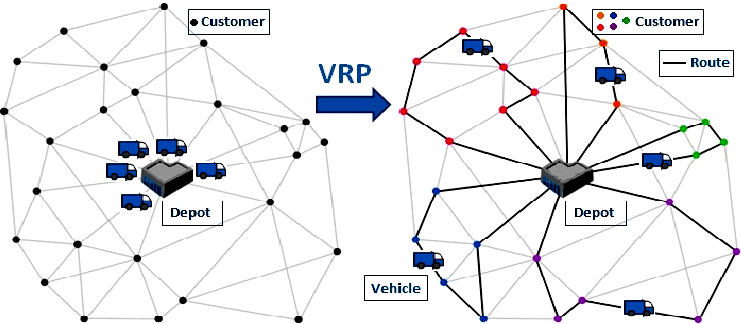

In [10]:
from IPython.display import Image, display
display(Image(filename="images/dd.png", width=650))





  <br/>
  <em>Figure 1 – Illustration du problème de routage de véhicules (VRP)</em>
</p>

<p style="text-align:justify;">
  Cette figure illustre le <strong>Vehicle Routing Problem (VRP)</strong>.
  Le dépôt central (<em>Depot</em>) est représenté au centre,
  tandis que les points (<em>Customers</em>) représentent les clients à livrer.
  Les flèches (<em>Routes</em>) indiquent les trajets réalisés par différents véhicules,
  chacun optimisant sa tournée. L’objectif est de <strong>minimiser la distance totale</strong>
  parcourue tout en respectant les contraintes de capacité et, dans le cas du
  <strong>CVRPTW</strong>, les fenêtres temporelles de service de chaque client.
</p>




### 🔸 Interprétation du graphe

Cette figure illustre la **modélisation graphique** du *Vehicle Routing Problem (VRP)*.  
Le graphe est constitué de plusieurs **éléments visuels** qui traduisent les composantes du problème réel :



#### 🏠 Le dépôt (Depot)
Situé au centre, il représente le **point de départ et de retour** des véhicules.  
Tous les trajets partent et reviennent à ce point.



#### 👥 Les clients (Customers)
Ce sont les **points répartis autour du dépôt**.  
Chaque client correspond à une destination où une **livraison** doit être effectuée.  
Dans le cas du **CVRPTW**, chaque client possède une **fenêtre de temps** pendant laquelle il peut être servi, symbolisant une **contrainte horaire**.



#### 🔁 Les arêtes (Routes)
Ce sont les **lignes reliant** le dépôt aux clients ou les clients entre eux.  
Elles représentent les **trajets possibles** que les véhicules peuvent emprunter.  
Les différentes **couleurs de routes** indiquent les **tournées attribuées à chaque véhicule**.



#### 🚚 Les véhicules (Vehicles)
Représentés par les **camions** sur le graphe.  
Chacun effectue une **tournée distincte** reliant un ensemble de clients, puis revient au dépôt.  
Ces tournées doivent respecter la **capacité maximale** de chaque véhicule (quantité transportable).



#### 🎨 Les couleurs
Chaque **couleur correspond à une tournée différente**.  
Cela permet de visualiser comment le **problème initial** (à gauche) est décomposé en plusieurs **sous-tournées optimisées** (à droite).



### 🔹 Interprétation visuelle globale

Le **graphe de gauche** représente le réseau complet de clients potentiels à visiter.  
Le **graphe de droite** montre la **solution organisée après optimisation** :  
chaque véhicule dessert un groupe de clients selon un trajet défini,  
en **minimisant la distance totale parcourue** et en respectant les **contraintes de capacité et de fenêtres temporelles**.



🧠 **En résumé :**  
Ce graphe met en évidence :
- la **structure du problème** (dépôt, clients, trajets) ;  
- la **répartition des tournées** entre véhicules ;  
- et la **transition visuelle** d’un problème global complexe vers plusieurs sous-problèmes optimisés.  

Il constitue la **représentation visuelle** du VRP, sur laquelle s’appuie la **modélisation mathématique** présentée dans la section suivante.


## 3. Analyse de complexité (preuve de NP-complétude)

### 3.1. Définition (version décision)  
Pour raisonner sur la complexité nous considérons la **version décision** du problème.

**Instance :** un graphe complet pondéré \(G=(V,E)\), un entier \(k\).  
**Question (Decision-VRP / Decision-ITSP) :** existe-t-il une tournée (ou un ensemble de tournées respectant les contraintes choisies) de coût total \(\le k\) qui visite chaque client au moins une fois (et respecte les contraintes imposées) ?

Nous allons montrer que cette version décisionnelle est **NP-complète**.

---

### 3.2. Le problème appartient à NP  
Soit une instance \((G,k)\). Un certificat est une tournée (ou un ensemble de tournées) décrite comme une liste ordonnée de sommets pour chaque véhicule.  
La vérification consiste à :

1. vérifier que chaque sommet client apparaît au moins une fois dans les tournées (coûts \(O(n+m)\)),
2. vérifier que les contraintes (capacités, fenêtres temporelles si présentes, etc.) sont respectées (calcul des charges, des temps d’arrivée – tout se fait en temps polynomial),
3. calculer le coût total de la tournée (somme de distances) et vérifier \(\le k\).

Chaque étape s’effectue en temps polynomial par rapport à la taille de l’entrée. Donc **Decision-VRP \(\in\) NP**.

---

### 3.3. NP-dureté (réduction polynomiale)  
Pour prouver NP-dureté, on montre une réduction polynomiale depuis un problème connu NP-complet. Deux réductions classiques :

#### A) Réduction directe depuis **Hamiltonian Cycle** (HC) vers **Decision-TSP** (puis vers Decision-VRP)
- **Hamiltonian Cycle (HC)** : instance un graphe non orienté \(G'=(V',E')\). Question : existe-t-il un cycle passant par chaque sommet exactement une fois ?
- Construisons une instance de **Decision-TSP** (graphe complet pondéré) \(G\) sur les mêmes sommets \(V'\) :
  - pour chaque paire \((u,v)\) : si \((u,v)\in E'\) alors mettre \(d(u,v)=1\), sinon \(d(u,v)=2\).
  - poser \(k = |V'|\).
- **Claim** : \(G'\) a un cycle Hamiltonien ssi il existe une tournée de coût \(\le k\) dans \(G\).
  - Si \(G'\) a un cycle Hamiltonien, ce cycle utilise uniquement des arêtes de \(E'\), donc coût \(=|V'| \le k\).
  - Inversement, si une tournée de coût \(\le k\) existe, elle doit n’utiliser que des arêtes de coût 1 (car toute arête de coût 2 augmente le coût au-dessus de \(k\)), donc ces arêtes appartiennent toutes à \(E'\) et forment un cycle Hamiltonien.
- Cette transformation est réalisée en temps polynomial. Ainsi **HC \(\le_p\) Decision-TSP**, donc Decision-TSP est NP-hard.

#### B) Réduction Decision-TSP → Decision-VRP
- La **Decision-VRP** généralise Decision-TSP : prendre une seule voiture (k = 1), capacités suffisantes (ou ignorées) et mêmes distances.  
- Construire l’instance VRP en posant \(k=1\) et en transférant la matrice de distances. Une solution VRP optimale avec un seul véhicule correspond exactement à la solution TSP.  
- Donc **Decision-TSP \(\le_p\) Decision-VRP**.

Combinant A) et B) on obtient une réduction polynomiale **HC → TSP → VRP**, donc **Decision-VRP est NP-hard**.

---




### Exemple illustratif : Réduction de Hamiltonian Cycle vers TSP

Dans la preuve de NP-complétude, on transforme une instance du **Hamiltonian Cycle (HC)** en instance du **Travelling Salesman Problem (TSP)**.

- Si deux sommets sont reliés dans le graphe HC → distance = 1  
- Sinon → distance = 2  
- Le seuil \( k = |V| \)

Une tournée de coût ≤ k existe **ssi** il existe un cycle Hamiltonien dans le graphe original.

Le code ci-dessous illustre cette réduction et affiche les deux graphes :
- à gauche, le graphe HC non pondéré,
- à droite, le graphe TSP pondéré équivalent.


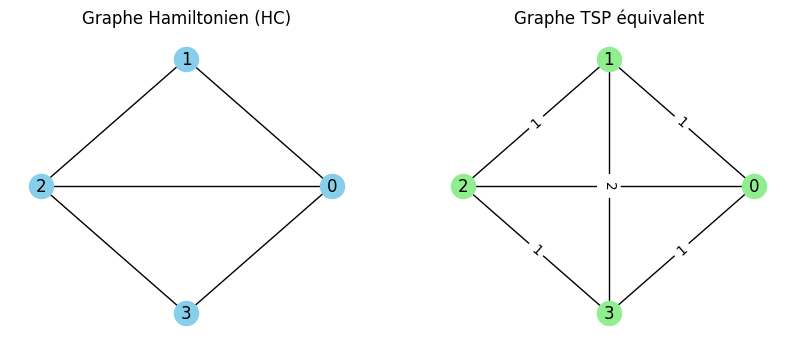

Nombre de sommets : 4
Seuil k = 4

Si le graphe HC possède un cycle Hamiltonien,
alors il existe une tournée dans G_TSP de coût ≤ k (toutes les arêtes de poids 1).
Sinon, toute tournée aura au moins une arête de poids 2, donc coût > k.
=> La réduction est correcte.



In [11]:
import networkx as nx
import matplotlib.pyplot as plt

# ===============================
# Réduction de Hamiltonian Cycle (HC) vers TSP
# ===============================

# 1️⃣ Graphe d'entrée pour le problème Hamiltonien (HC)
# Un graphe simple où on cherche un cycle passant par tous les sommets
G_HC = nx.Graph()
G_HC.add_edges_from([
    (0, 1), (1, 2), (2, 3), (3, 0),  # Cycle Hamiltonien existe (0-1-2-3-0)
    (0, 2)  # Une arête en plus (optionnelle)
])

# 2️⃣ Construction du graphe TSP équivalent
# Pour chaque paire (u, v), on met :
#   - poids = 1 si (u, v) ∈ E_HC
#   - poids = 2 sinon
G_TSP = nx.complete_graph(G_HC.nodes())
for (u, v) in G_TSP.edges():
    if G_HC.has_edge(u, v):
        G_TSP[u][v]['weight'] = 1
    else:
        G_TSP[u][v]['weight'] = 2

# 3️⃣ Affichage comparatif
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

pos = nx.circular_layout(G_HC)

# Graphe HC
nx.draw(G_HC, pos, with_labels=True, node_color='skyblue', ax=axs[0])
axs[0].set_title("Graphe Hamiltonien (HC)")
# Graphe TSP pondéré
nx.draw(G_TSP, pos, with_labels=True, node_color='lightgreen', ax=axs[1])
labels = nx.get_edge_attributes(G_TSP, 'weight')
nx.draw_networkx_edge_labels(G_TSP, pos, edge_labels=labels, ax=axs[1])
axs[1].set_title("Graphe TSP équivalent")

plt.show()

# 4️⃣ Vérification : coût cible
n = len(G_TSP.nodes())
k = n  # coût maximum autorisé (si toutes les arêtes valent 1)
print(f"Nombre de sommets : {n}")
print(f"Seuil k = {k}")

# 5️⃣ Explication
print("""
Si le graphe HC possède un cycle Hamiltonien,
alors il existe une tournée dans G_TSP de coût ≤ k (toutes les arêtes de poids 1).
Sinon, toute tournée aura au moins une arête de poids 2, donc coût > k.
=> La réduction est correcte.
""")


### Réduction de TSP vers VRP

Pour prouver que le **Vehicle Routing Problem (VRP)** est NP-difficile,  
on peut montrer comment transformer une instance du **Travelling Salesman Problem (TSP)** en une instance équivalente du VRP.

#### Principe de la réduction :
- On part d’une instance TSP : un ensemble de villes et une matrice de distances.
- On ajoute un **dépôt (depot)** qui sera le point de départ et d’arrivée du camion.
- On considère **un seul véhicule (k = 1)**.
- On donne une **capacité infinie** au véhicule (ou suffisante pour tout livrer).
- Chaque client représente une “livraison” de demande 1.

Alors :
- Une solution du TSP correspond exactement à une tournée valide du VRP (avec 1 camion).
- Le coût total est identique.

Ainsi, résoudre le VRP pour un seul véhicule revient à résoudre le TSP.
Cela montre que le **VRP est NP-difficile**.


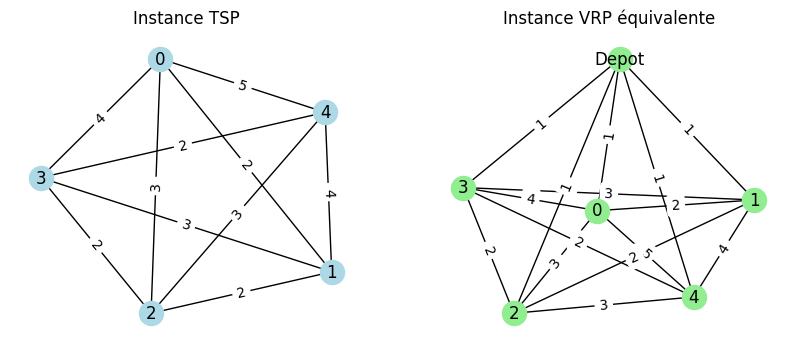

Nombre de villes TSP : 5
Nombre de nœuds VRP (avec dépôt) : 6

✅ Une tournée optimale du VRP avec 1 seul camion et capacité illimitée
   correspond exactement à une tournée optimale du TSP.
=> Le VRP est au moins aussi difficile que le TSP (donc NP-difficile).



In [12]:
import networkx as nx
import matplotlib.pyplot as plt

# ===============================
# Réduction de TSP vers VRP
# ===============================

# 1️⃣ Instance du TSP : un graphe complet avec coûts
G_TSP = nx.complete_graph(5)  # 5 villes
for (u, v) in G_TSP.edges():
    if u != v:
        G_TSP[u][v]['weight'] = abs(u - v) + 1  # poids simple pour exemple

# 2️⃣ Transformation : ajout du dépôt pour le VRP
G_VRP = nx.Graph()
depot = "Depot"

# On garde toutes les arêtes TSP
for (u, v, data) in G_TSP.edges(data=True):
    G_VRP.add_edge(u, v, weight=data["weight"])

# Ajout du dépôt relié à toutes les villes
for city in G_TSP.nodes():
    G_VRP.add_edge(depot, city, weight=1)

# 3️⃣ Visualisation
pos_tsp = nx.spring_layout(G_TSP, seed=42)
pos_vrp = nx.spring_layout(G_VRP, seed=42)

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Graphe TSP
nx.draw(G_TSP, pos_tsp, with_labels=True, node_color='lightblue', ax=axs[0])
labels_tsp = nx.get_edge_attributes(G_TSP, 'weight')
nx.draw_networkx_edge_labels(G_TSP, pos_tsp, edge_labels=labels_tsp, ax=axs[0])
axs[0].set_title("Instance TSP")

# Graphe VRP
nx.draw(G_VRP, pos_vrp, with_labels=True, node_color='lightgreen', ax=axs[1])
labels_vrp = nx.get_edge_attributes(G_VRP, 'weight')
nx.draw_networkx_edge_labels(G_VRP, pos_vrp, edge_labels=labels_vrp, ax=axs[1])
axs[1].set_title("Instance VRP équivalente")

plt.show()

# 4️⃣ Vérification
print(f"Nombre de villes TSP : {len(G_TSP.nodes())}")
print(f"Nombre de nœuds VRP (avec dépôt) : {len(G_VRP.nodes())}")
print("""
✅ Une tournée optimale du VRP avec 1 seul camion et capacité illimitée
   correspond exactement à une tournée optimale du TSP.
=> Le VRP est au moins aussi difficile que le TSP (donc NP-difficile).
""")


### Conclusion de la chaîne de réduction

Nous avons illustré la chaîne logique suivante :

\[
HC \leq_p TSP \leq_p VRP
\]

- Le **Hamiltonian Cycle (HC)** est NP-complet.
- Le **Travelling Salesman Problem (TSP)** est une généralisation pondérée de HC → donc NP-difficile.
- Le **Vehicle Routing Problem (VRP)** généralise le TSP (plusieurs véhicules, capacités, contraintes de temps, etc.) → donc également NP-difficile.

Ainsi, le problème de planification de tournées dans notre projet (VRP avec contraintes)
hérite naturellement de cette complexité.
C’est pourquoi nous devons utiliser des **métaheuristiques** (comme le recuit simulé, la recherche tabou, ou les algorithmes génétiques)
pour obtenir des solutions approchées efficaces.


### 3.4. Conclusion
La version décisionnelle de notre problème appartient à NP et est NP-hard par réduction polynomiale depuis Hamiltonian Cycle.  
Par conséquent **Decision-VRP est NP-complet**.

Remarque : l’ajout de contraintes (fenêtres temporelles, flotte hétérogène, trafic dynamique) conserve au minimum la difficulté NP-hard (les variantes sont en général aussi NP-hard, parfois plus difficiles), car on peut toujours encoder une instance de TSP/Hamiltonian dans une instance restreinte du VRP.

### 3.5. Cas du **CVRPTW** : extension du **VRP** classique

Le **CVRPTW** (*Capacitated Vehicle Routing Problem with Time Windows*) est une **extension directe** du **VRP** classique.  
Il introduit deux ensembles supplémentaires de contraintes :

1. **Contraintes de capacité**  
   Chaque véhicule possède une capacité maximale $Q$.  
   La somme des demandes des clients visités sur une tournée ne doit pas dépasser cette capacité :  
   $$
   \sum_{i \in \text{tournée}_v} q_i \le Q
   $$
   où $q_i$ est la demande du client $i$.

2. **Fenêtres temporelles (Time Windows)**  
   Chaque client $i$ doit être servi dans un intervalle de temps $[a_i, b_i]$.  
   Cela impose des contraintes sur l’ordre et le moment des visites :  
   $$
   a_i \le t_i \le b_i
   $$
   où $t_i$ représente le temps d’arrivée du véhicule chez le client $i$.

---

### Preuve de la complexité du **CVRPTW**

- Le **VRP** est déjà **NP-complet**, comme démontré précédemment (par réduction depuis le **TSP** et le **Hamiltonian Cycle**).  
- Le **CVRPTW** généralise le VRP :  
  - Si l’on supprime les fenêtres temporelles et que les capacités sont considérées comme infinies, le **CVRPTW** se réduit exactement à un **VRP**.  
  - Ainsi, toute instance du VRP est un **cas particulier** du CVRPTW.

Par conséquent, comme le **VRP** est NP-complet et que le **CVRPTW** englobe le VRP, on a :  
$$
\text{VRP} \le_p \text{CVRPTW}
$$

Ce qui implique que le **CVRPTW** est au moins aussi difficile que le VRP, donc **NP-difficile**.  
Et comme la vérification d’une solution reste polynomiale (mêmes arguments que précédemment) :  
$$
\text{CVRPTW} \in \text{NP}
$$

Ainsi, le **CVRPTW** est **NP-complet**.

---

### Interprétation

Ce résultat signifie que :

- Aucune méthode exacte ne peut garantir une solution optimale en temps polynomial (sauf si $P = NP$).  
- En pratique, on utilise donc des **métaheuristiques** (*recherche tabou*, *algorithmes génétiques*, *recuit simulé*, etc.) pour obtenir des solutions approchées efficaces.

---

### ✅ Résumé global de la preuve de NP-complétude

$$
\text{HC} \le_p \text{TSP} \le_p \text{VRP} \le_p \text{CVRPTW}
$$

Tous ces problèmes appartiennent à $\text{NP}$,  
et le **CVRPTW** hérite directement de la **NP-complétude** du **VRP**.


### 4. Modélisation mathématique (VRP - formulation utilisée)

Soit un graphe complet pondéré $G = (V, E)$ où :

- $V = \{0, 1, \dots, n\}$ : $0$ = dépôt, $1 \ldots n$ = clients.
- $d_{ij}$ : distance (ou coût) entre $i$ et $j$.
- $q_i$ : demande du client $i$ (avec $q_0 = 0$).
- $C$ : capacité maximale d'un véhicule.
- $K$ : nombre de véhicules disponibles (paramètre).

**Variables de décision**
- $x_{ij} \in \{0, 1\}$ vaut 1 si on emprunte l'arc $i \to j$, 0 sinon.
- $u_i$ (continue) : variable auxiliaire MTZ représentant la charge cumulée embarquée après la visite de $i$ (pour $i \neq 0$).

**Fonction objectif**

$$
\min Z = \sum_{i \in V} \sum_{\substack{j \in V \\ j \neq i}} d_{ij} \, x_{ij}
$$


### **Contraintes**

1. **Chaque client est visité exactement une fois (sortie / entrée)**  
$$
\sum_{\substack{j \in V \\ j \neq i}} x_{ij} = 1, \quad \forall i \in V \setminus \{0\}
$$
$$
\sum_{\substack{i \in V \\ i \neq j}} x_{ij} = 1, \quad \forall j \in V \setminus \{0\}
$$

2. **Départs et retours au dépôt (K tournées)**  
$$
\sum_{\substack{j \in V \\ j \neq 0}} x_{0j} = K, \qquad
\sum_{\substack{i \in V \\ i \neq 0}} x_{i0} = K
$$

3. **MTZ (élimination des sous-tours + capacité)**  
$$
q_i \leq u_i \leq C, \quad \forall i \in V \setminus \{0\}
$$
$$
u_i - u_j + C x_{ij} \leq C - q_j, \quad \forall i \neq j, \; i, j \in V \setminus \{0\}
$$
Ces contraintes lient l'ordre de visite à la capacité et suppriment les sous-tours.

4. **Domaine**  
$$
x_{ij} \in \{0, 1\}, \quad u_i \in \mathbb{R}_{+}
$$

---

**Remarques**
- Si tu veux laisser le solveur décider du nombre de véhicules, remplace les égalités du point 2 par des \( \leq K \) ou \( \leq 1 \) selon le cas.  
- La formulation **MTZ** fonctionne bien pour des instances de taille petite à moyenne. Pour des problèmes plus grands (plusieurs centaines de clients), il est préférable d'utiliser une formulation par flot ou une méthode heuristique.

### 4.1 Version de base (rappel)

**But.** Relier un ensemble de clients `N` depuis/vers un dépôt `0` en minimisant le **coût total** (distance/temps total).

**Hypothèses de base.**
- Graphe dirigé $G=(V,A)$, $V=\{0\}\cup N$, coûts/temps $\tau_{ij}\ge 0$, temps de service $s_i\ge 0$.
- Chaque client est visité une et une seule fois par un unique véhicule.
- Conservation des flux : si un véhicule entre chez un client, il en sort.
- Départ/retour au dépôt.

> Cette base est étendue ci-dessous avec **capacités**, **flotte multi-camions** et **fenêtres temporelles** (attente autorisée).


### 4.2 Contraintes retenues & périmètre

Nous ajoutons au VRP de base :

1. **Capacité des camions** : chaque camion a une capacité $Q$ (poids ou volume transportable).  
2. **Flotte multi-camions** : $k$ camions **identiques** disponibles en parallèle (certains peuvent rester inutilisés).  
3. **Fenêtres temporelles (VRPTW)** : chaque client $i$ a un créneau $[a_i, b_i]$ ; **attente autorisée** si arrivée avant $a_i$.

**Objectif maintenu :** minimiser le **coût total**  
$$
\sum_{k\in K}\sum_{(i,j)\in A} \tau_{ij}\,x_{ijk}
$$  
(plus facile à valider sur les benchmarks VRPLIB qu’un makespan).


### 4.3 Notations (extensions)

**Ensembles**
- $K = \{1, \dots, k\}$ : camions  
- $N$ : clients  
- $V = \{0\} \cup N$ : ensemble des sommets ($0$ = dépôt)  
- $A = \{(i,j) \in V^2 : i \neq j\}$ : arcs orientés possibles  

**Paramètres**
- $q_i \ge 0$ : demande du client $i$  
- $Q > 0$ : capacité (identique) d’un camion  
- $\tau_{ij} \ge 0$ : temps (ou distance) sur l’arc $(i,j)$  
- $s_i \ge 0$ : temps de service au sommet $i$  
- $[a_i, b_i]$ : fenêtre temporelle du client $i$  
- $M$ : grande constante (borne supérieure sur les temps, utilisée dans les contraintes de temps)  

**Variables de décision**
- $x_{ijk} \in \{0,1\}$ : le camion $k$ emprunte l’arc $(i,j)$  
- $t_i \ge 0$ : **début de service** au client $i$ (chaque client est servi une seule fois)  
- $u_i \ge 0$ : **charge du véhicule** juste après le service au sommet $i$ (formulation MTZ-capacité, 1D)


### 4.4 Modèle étendu (VRPTW-Cap, multi-camions)

**Objectif(minimiser le coût total de toutes les tournées effectuées par l’ensemble des camions)**

$$
\min \sum_{k\in K}\sum_{(i,j)\in A} \tau_{ij}\, x_{ijk}
$$

---

**1) Visite unique de chaque client**

$$
\sum_{k\in K}\sum_{j\in V\setminus\{i\}} x_{ijk} = 1, \quad
\sum_{k\in K}\sum_{j\in V\setminus\{i\}} x_{jik} = 1,
\quad \forall i\in N
$$

---

**2) Continuité des tournées par véhicule (ariver et quiter le stop chez le client)**

$$
\sum_{j\in V\setminus\{i\}} x_{ijk} - 
\sum_{j\in V\setminus\{i\}} x_{jik} = 0,
\quad \forall i\in N,\ \forall k\in K
$$

---

**3) Dépôt **

$$
\sum_{j\in N} x_{0jk} \le 1, \qquad
\sum_{i\in N} x_{i0k} \le 1, \quad \forall k\in K
$$

*(mettre $=1$ si tu imposes d’utiliser tous les camions)*

---

**4) Capacité (formulation MTZ-capacité, 1D)**

$$
u_{0} = 0, \qquad q_i \le u_i \le Q, \quad \forall i\in N
$$

$$
u_j \ge u_i + q_j - Q\left(1 - \sum_{k\in K} x_{ijk}\right),
\quad \forall i\in V, \forall j\in N, i\neq j
$$

*(si $(i,j)$ est utilisé par un camion, la charge progresse de $q_j$ et reste $\le Q$)*

---

**5) Fenêtres temporelles + attente autorisée**

$$
a_i \le t_i \le b_i, \quad \forall i\in N
$$

$$
t_0 = 0
$$

$$
t_j \ge t_i + s_i + \tau_{ij} - M(1 - x_{ijk}),
\quad \forall k\in K, \forall (i,j)\in A
$$

*(si le véhicule arrive avant $a_i$, il attend implicitement jusqu’à l’ouverture de la fenêtre)*




## 5. Contraintes retenues et justification

### 5.1 Capacité
Chaque camion transporte un volume maximal Q (cas e-commerce).  
→ Permet de modéliser le remplissage des véhicules.

### 5.2 Fenêtres temporelles
Chaque client a un créneau horaire [a_i, b_i].  
→ Reflète la réalité des livraisons à domicile (attente possible si arrivée avant).

### 5.3 Flotte multi-véhicules
Véhicules identiques, disponibles en parallèle.  
→ Représente un dépôt central avec plusieurs tournées.

### 5.4 Contraintes non retenues
- Pas de contraintes de priorités entre clients.  
- Pas de contraintes environnementales (pour simplifier la première version).



## 4. Références bibliographiques

- Dantzig, G. B., & Ramser, J. H. (1959). *The Truck Dispatching Problem.*
- Toth, P., & Vigo, D. (2014). *Vehicle Routing: Problems, Methods, and Applications.*
- VRPLIB : https://vrplib.readthedocs.io
